In [ ]:
packages <- c("tidyverse", "janitor", "skimr", "GGally","psych")

for (p in packages) {
  if (!requireNamespace(p, quietly = TRUE)) {
    install.packages(p, repos = "https://cloud.r-project.org")
  }
  library(p, character.only = TRUE)
}


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’


Instal

In [ ]:
# ------------------------
# Load Required Libraries
# ------------------------
library(tidyverse)    # dplyr + ggplot2
library(ggplot2)
library(dplyr)
library(readr)
library(psych)        # for describe()
library(GGally)       # for correlation plots

In [ ]:
# ------------------------
# Load Cleaned Dataset
# ------------------------
stroke <- read_csv("stroke_cleaned.csv")

Rows: 4896 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): gender, ever_married, work_type, residence_type, smoking_status, ag...
dbl (7): id, age, hypertension, heart_disease, avg_glucose_level, bmi, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# Preview the first 6 rows of data
head(stroke)

id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior,Obese
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior,Obese
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle Age,Obese
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior,Normal
56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Senior,Overweight
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,Senior,Overweight


In [ ]:
# Check structure of the dataset (column types and example values)
str(stroke)

spc_tbl_ [4,896 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id               : num [1:4896] 9046 31112 60182 1665 56669 ...
 $ gender           : chr [1:4896] "Male" "Male" "Female" "Female" ...
 $ age              : num [1:4896] 67 80 49 79 81 74 69 78 81 61 ...
 $ hypertension     : num [1:4896] 0 0 0 1 0 1 0 0 1 0 ...
 $ heart_disease    : num [1:4896] 1 1 0 0 0 1 0 0 0 1 ...
 $ ever_married     : chr [1:4896] "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr [1:4896] "Private" "Private" "Private" "Self-employed" ...
 $ residence_type   : chr [1:4896] "Urban" "Rural" "Urban" "Rural" ...
 $ avg_glucose_level: num [1:4896] 229 106 171 174 186 ...
 $ bmi              : num [1:4896] 36.6 32.5 34.4 24 29 27.4 22.8 24.2 29.7 36.8 ...
 $ smoking_status   : chr [1:4896] "formerly smoked" "never smoked" "smokes" "never smoked" ...
 $ stroke           : num [1:4896] 1 1 1 1 1 1 1 1 1 1 ...
 $ age_group        : chr [1:4896] "Senior" "Senior" "Middle Age" "Senior" ...
 $ bmi_category 

In [ ]:
# Summary statistics for all columns (min, max, mean, median, etc.)
summary(stroke)

       id           gender               age         hypertension    
 Min.   :   77   Length:4896        Min.   : 0.08   Min.   :0.00000  
 1st Qu.:18602   Class :character   1st Qu.:25.00   1st Qu.:0.00000  
 Median :37544   Mode  :character   Median :44.00   Median :0.00000  
 Mean   :37048                      Mean   :42.87   Mean   :0.09109  
 3rd Qu.:55138                      3rd Qu.:60.00   3rd Qu.:0.00000  
 Max.   :72940                      Max.   :82.00   Max.   :1.00000  
 heart_disease     ever_married        work_type         residence_type    
 Min.   :0.00000   Length:4896        Length:4896        Length:4896       
 1st Qu.:0.00000   Class :character   Class :character   Class :character  
 Median :0.00000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.04963                                                           
 3rd Qu.:0.00000                                                           
 Max.   :1.00000                                      

In [ ]:
# Number of rows and columns in dataset
dim(stroke)  # Rows x Columns

[1] 4896   14

In [ ]:
# Check if there are any missing values (should be 0 after cleaning)
colSums(is.na(stroke))

id            gender               age      hypertension 
                0                 0                 0                 0 
    heart_disease      ever_married         work_type    residence_type 
                0                 0                 0                 0 
avg_glucose_level               bmi    smoking_status            stroke 
                0                 0                 0                 0 
        age_group      bmi_category 
                0                 0

In [ ]:
# More detailed descriptive statistics using psych package
psych::describe(stroke)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,4896,3.704774e+04,2.097479e+04,37544.50,37134.789178,26974.42440,77.00,72940.00,72863.00,-0.03905066,-1.2054632,2.997622e+02
gender*,2,4896,1.410335e+00,4.923598e-01,1.00,1.387698,0.00000,1.00,3.00,2.00,0.36959183,-1.8499125,7.036584e-03
age,3,4896,4.286706e+01,2.257309e+01,44.00,43.175089,26.68680,0.08,82.00,81.92,-0.11883788,-0.9909337,3.226044e-01
hypertension,4,4896,9.109477e-02,2.877732e-01,0.00,0.000000,0.00000,0.00,1.00,1.00,2.84127693,6.0740953,4.112725e-03
heart_disease,5,4896,4.963235e-02,2.172064e-01,0.00,0.000000,0.00000,0.00,1.00,1.00,4.14606262,15.1929385,3.104216e-03
ever_married*,6,4896,1.652165e+00,4.763320e-01,2.00,1.690148,0.00000,1.00,2.00,1.00,-0.63877280,-1.5922944,6.807522e-03
work_type*,7,4896,3.485090e+00,1.282945e+00,4.00,3.606177,0.00000,1.00,5.00,4.00,-0.89864871,-0.5173220,1.833527e-02
residence_type*,8,4896,1.507557e+00,4.999939e-01,2.00,1.509444,0.00000,1.00,2.00,1.00,-0.03022295,-1.9994948,7.145688e-03
avg_glucose_level,9,4896,1.053156e+02,4.442358e+01,91.68,97.022374,25.81948,55.12,271.74,216.62,1.61426942,1.9039874,6.348818e-01


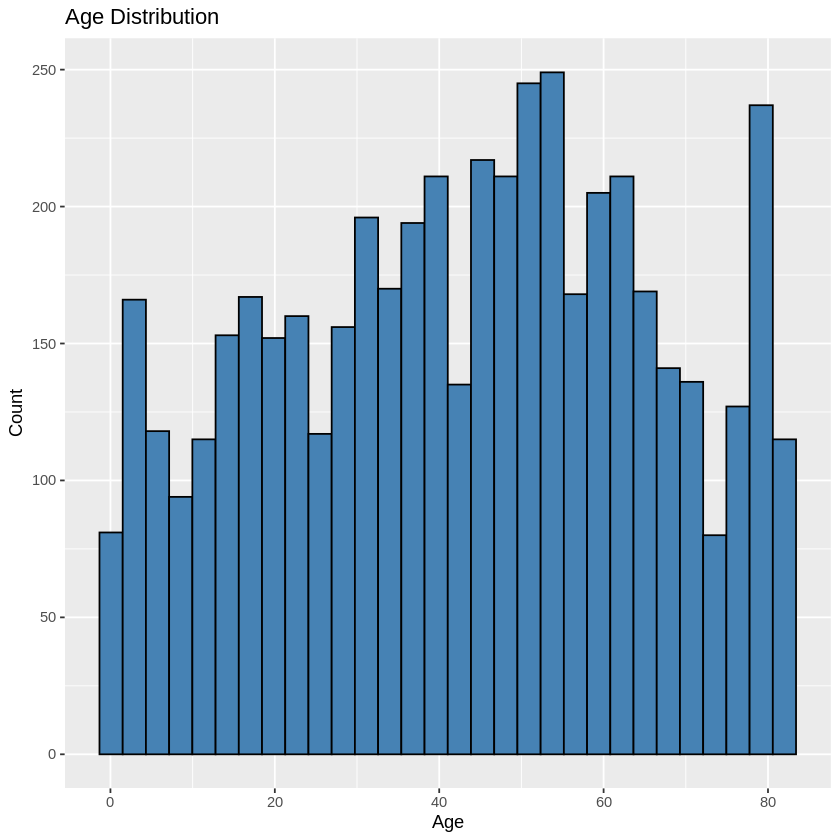

In [ ]:
# ------------------------
# Age Distribution
# ------------------------
# Plot histogram to see how ages are distributed
ggplot(stroke, aes(age)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "black") +
  labs(title = "Age Distribution", x = "Age", y = "Count")


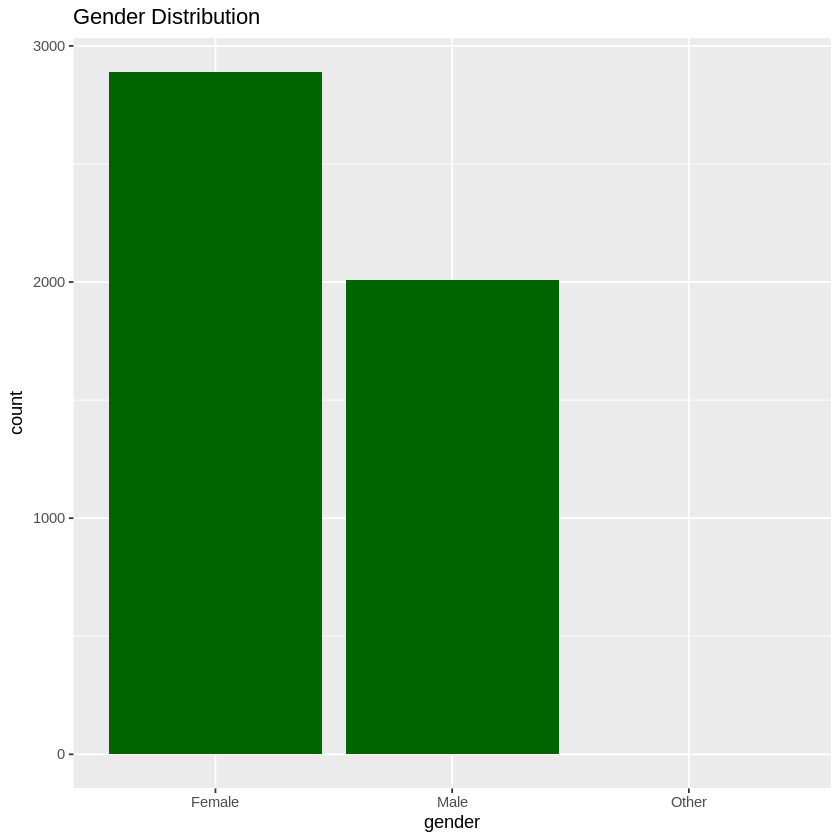

In [ ]:
# ------------------------
# Gender Distribution
# ------------------------
# Count number of males vs females
ggplot(stroke, aes(x = gender)) +
  geom_bar(fill = "darkgreen") +
  labs(title = "Gender Distribution")


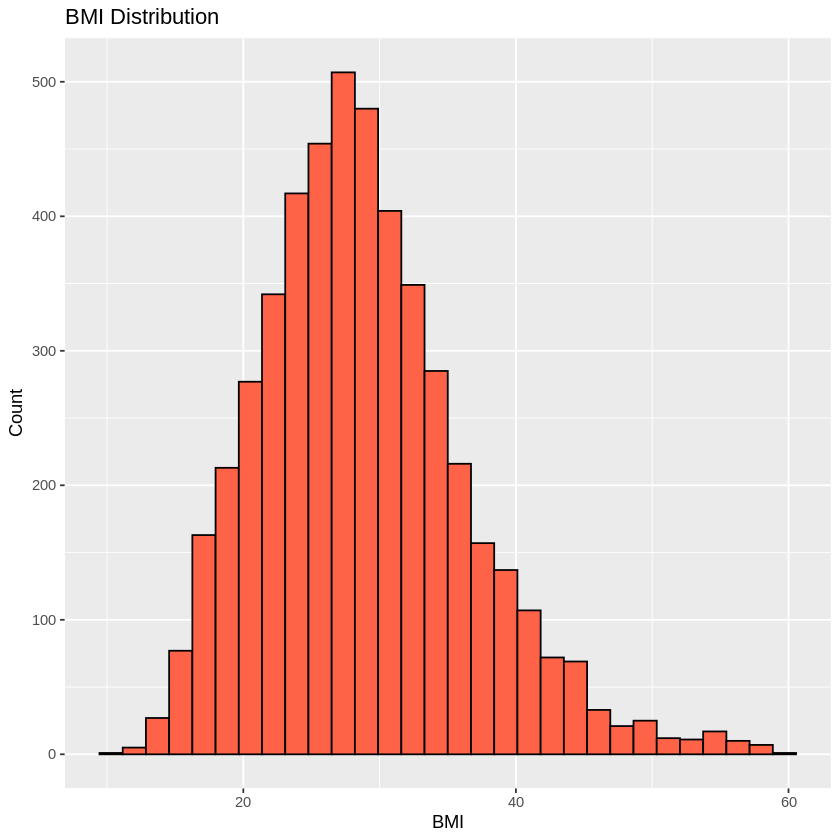

In [ ]:
# ------------------------
# BMI Distribution
# ------------------------
# Histogram of BMI
ggplot(stroke, aes(x = bmi)) +
  geom_histogram(bins = 30, fill = "tomato", color = "black") +
  labs(title = "BMI Distribution", x = "BMI", y = "Count")

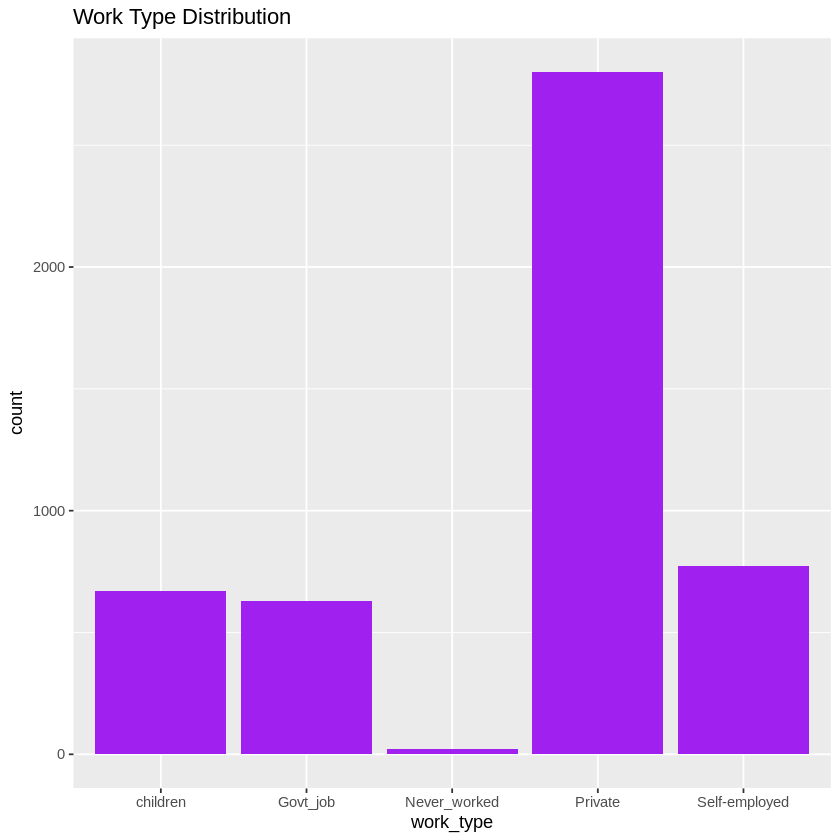

In [ ]:
# ------------------------
# Work Type Distribution
# ------------------------
ggplot(stroke, aes(x = work_type)) +
  geom_bar(fill = "purple") +
  labs(title = "Work Type Distribution")

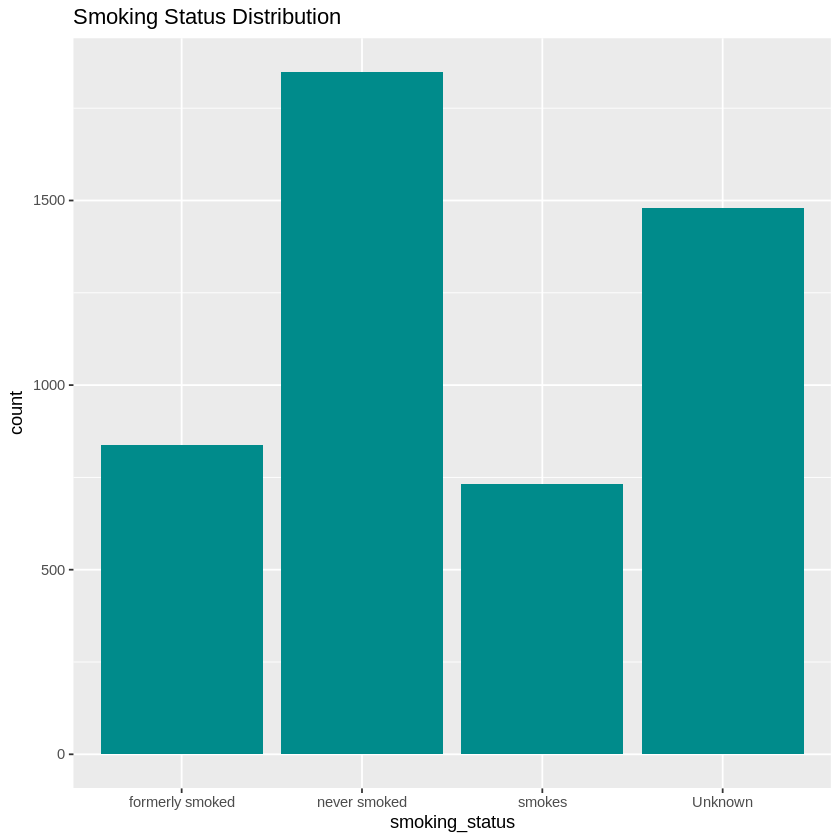

In [ ]:
# ------------------------
# Smoking Status Distribution
# ------------------------
ggplot(stroke, aes(x = smoking_status)) +
  geom_bar(fill = "cyan4") +
  labs(title = "Smoking Status Distribution")

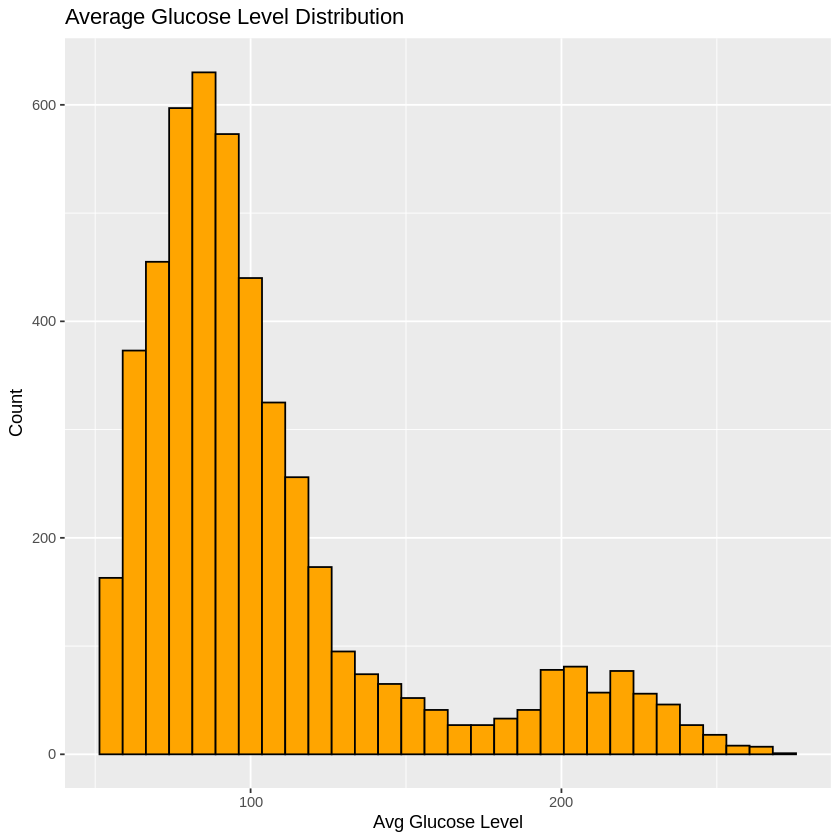

In [ ]:
# ------------------------
# Average Glucose Level Distribution
# ------------------------
ggplot(stroke, aes(x = avg_glucose_level)) +
  geom_histogram(bins = 30, fill = "orange", color = "black") +
  labs(title = "Average Glucose Level Distribution", x = "Avg Glucose Level", y = "Count")


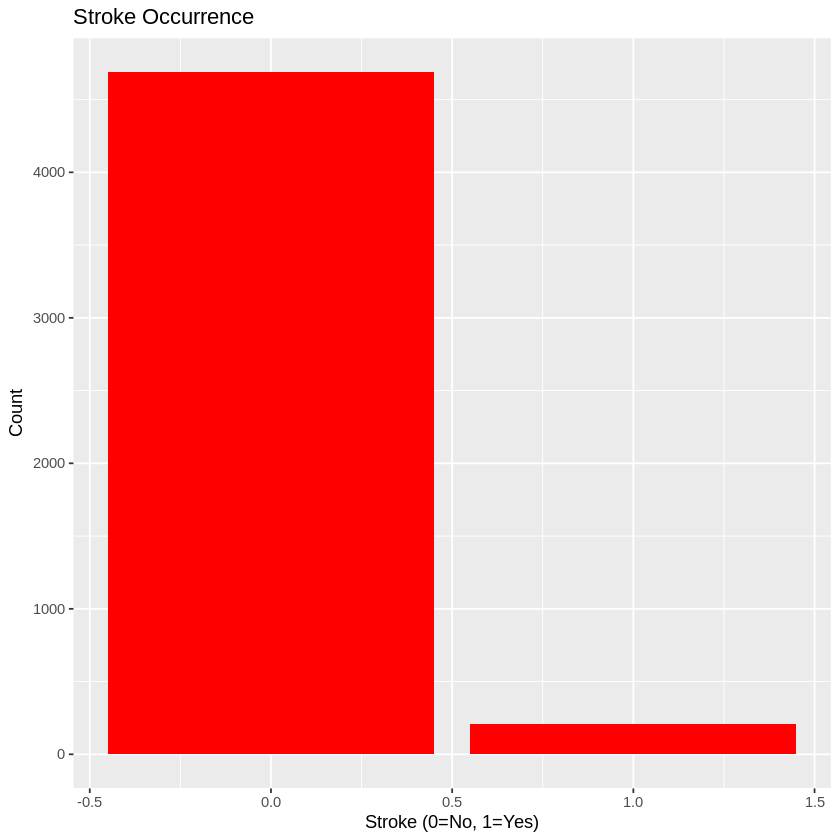

In [ ]:
# ------------------------
# Stroke Count
# ------------------------
ggplot(stroke, aes(x = stroke)) +
  geom_bar(fill = "red") +
  labs(title = "Stroke Occurrence", x = "Stroke (0=No, 1=Yes)", y = "Count")

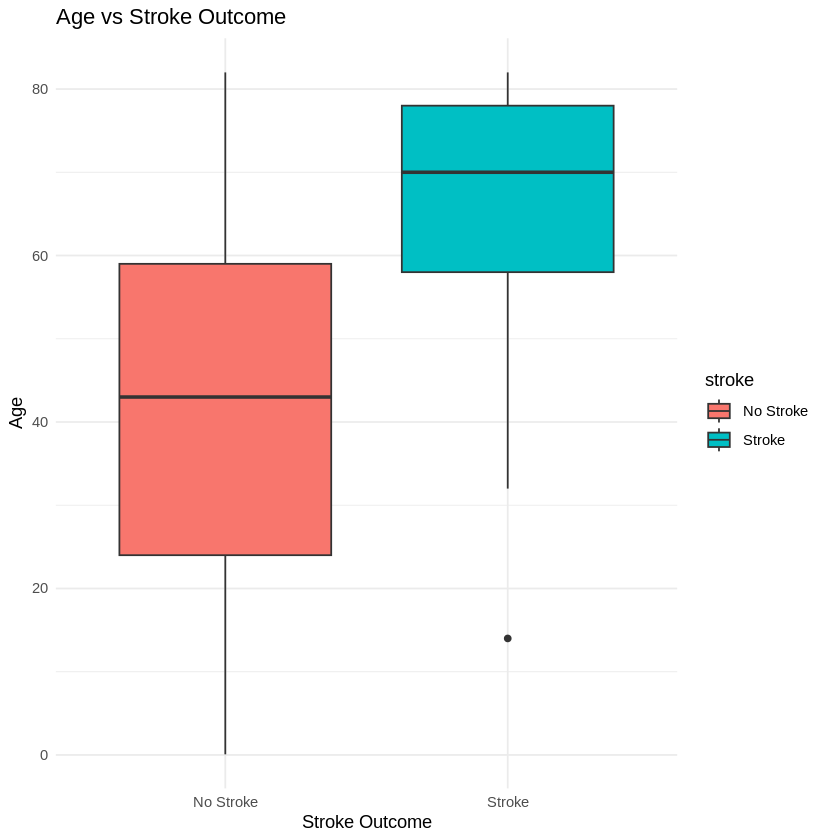

In [ ]:
# ------------------------
# Age vs Stroke
# ------------------------

# Convert stroke to factor with readable labels
stroke$stroke <- factor(stroke$stroke, levels = c(0, 1),
                        labels = c("No Stroke", "Stroke"))
# Boxplot to compare age distribution for stroke vs no stroke
ggplot(stroke, aes(x = stroke, y = age, fill = stroke)) +
  geom_boxplot() +
  labs(title = "Age vs Stroke Outcome",
       x = "Stroke Outcome",
       y = "Age") +
  theme_minimal()


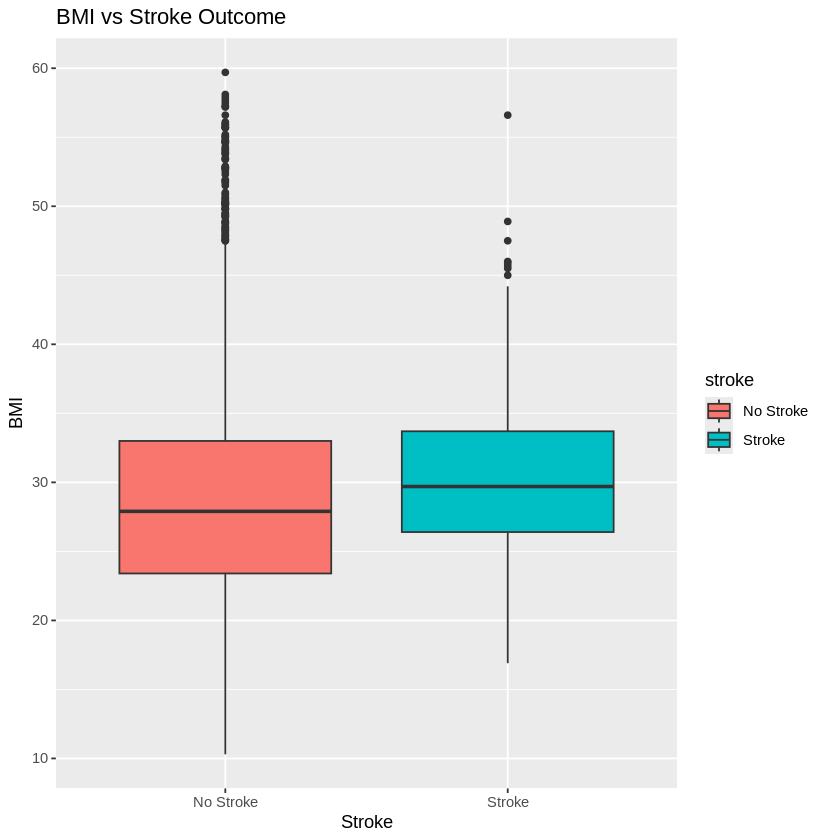

In [ ]:
# ------------------------
# BMI vs Stroke
# ------------------------
ggplot(stroke, aes(x = stroke, y = bmi, fill = stroke)) +
  geom_boxplot() +
  labs(title = "BMI vs Stroke Outcome", x = "Stroke", y = "BMI")

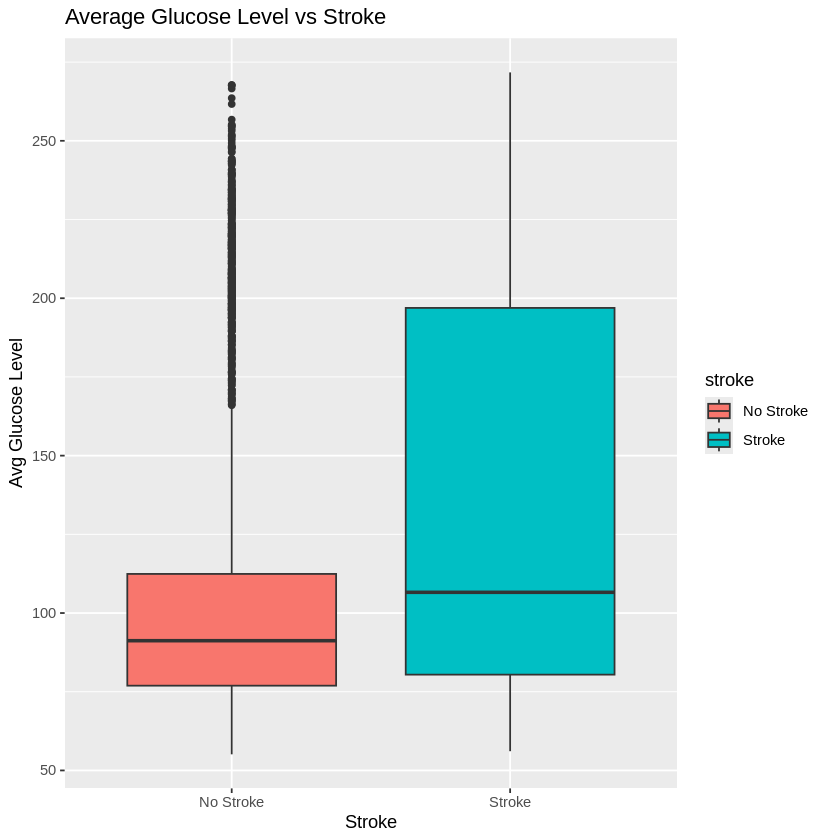

In [ ]:
# ------------------------
# Avg Glucose Level vs Stroke
# ------------------------
ggplot(stroke, aes(x = stroke, y = avg_glucose_level, fill = stroke)) +
  geom_boxplot() +
  labs(title = "Average Glucose Level vs Stroke", x = "Stroke", y = "Avg Glucose Level")

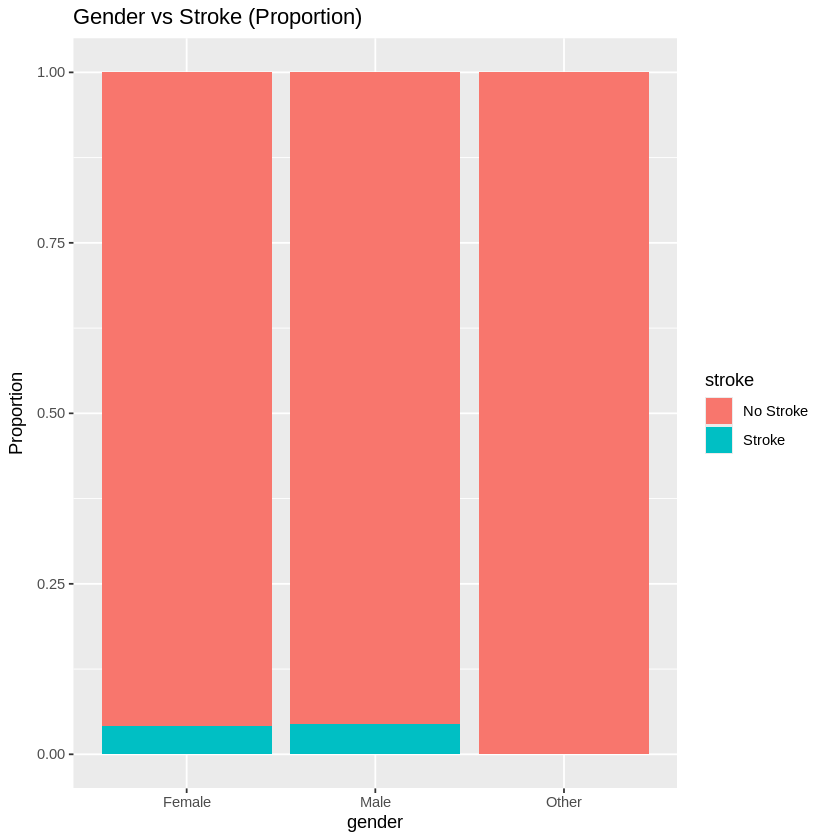

In [ ]:
# ------------------------
# Gender vs Stroke (Proportion)
# ------------------------
ggplot(stroke, aes(x = gender, fill = stroke)) +
  geom_bar(position = "fill") +  # Show proportions instead of counts
  labs(title = "Gender vs Stroke (Proportion)", y = "Proportion")


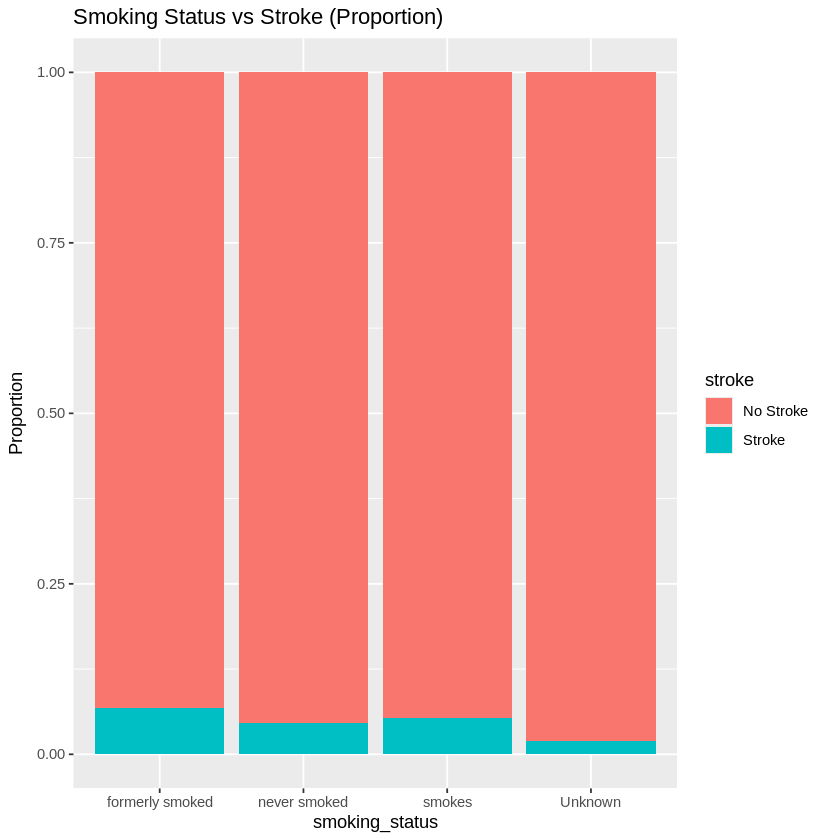

In [ ]:
# ------------------------
# Smoking Status vs Stroke (Proportion)
# ------------------------
ggplot(stroke, aes(x = smoking_status, fill = stroke)) +
  geom_bar(position = "fill") +
  labs(title = "Smoking Status vs Stroke (Proportion)", y = "Proportion")

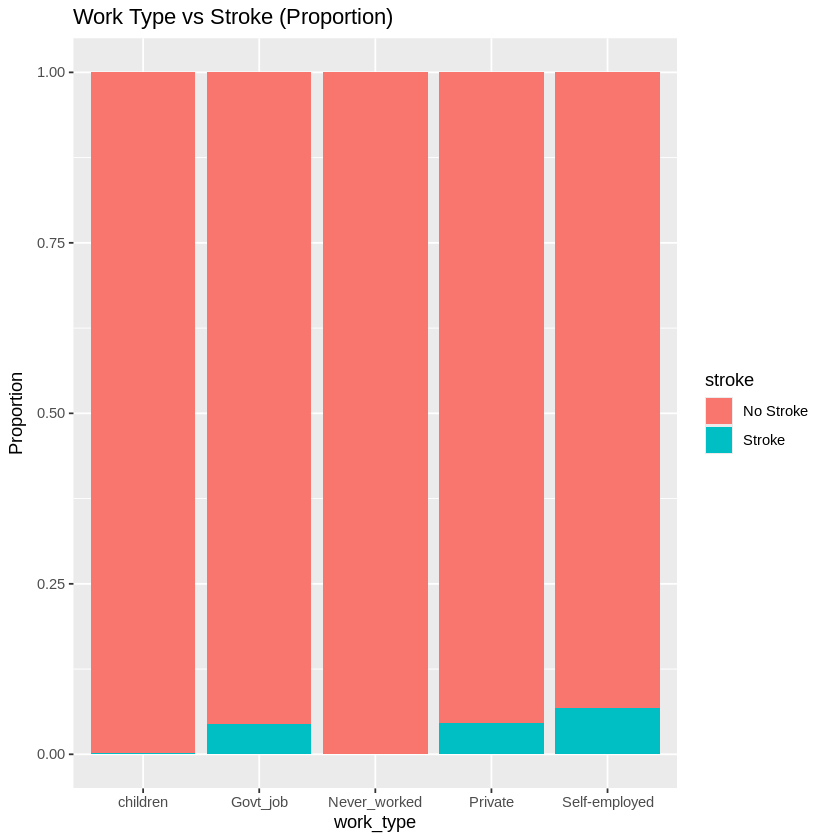

In [ ]:
# ------------------------
# Work Type vs Stroke (Proportion)
# ------------------------
ggplot(stroke, aes(x = work_type, fill = stroke)) +
  geom_bar(position = "fill") +
  labs(title = "Work Type vs Stroke (Proportion)", y = "Proportion")

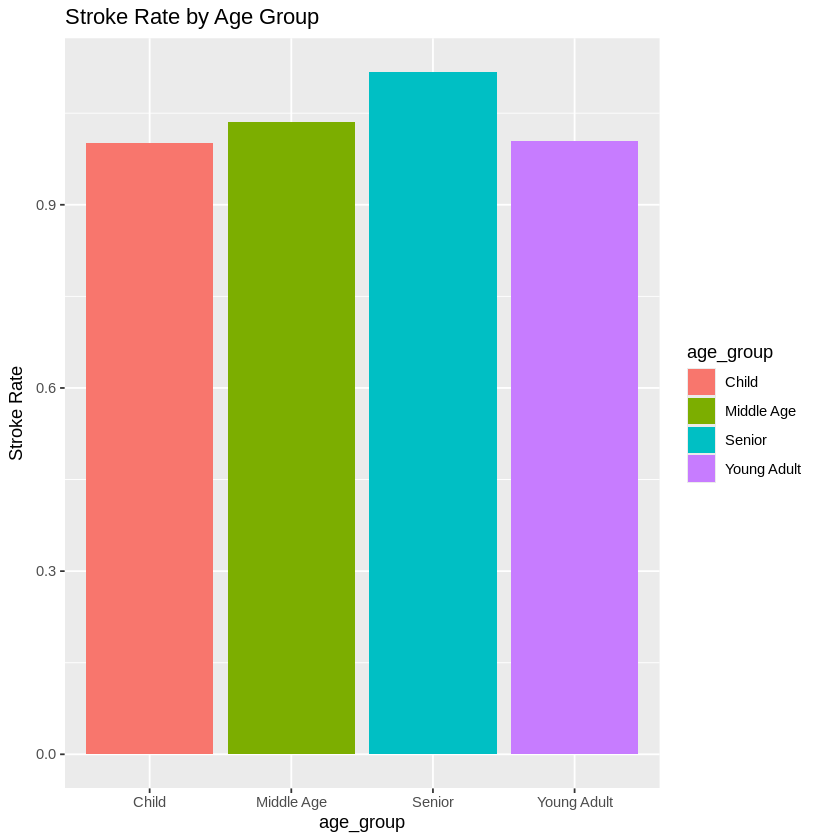

In [ ]:
# ------------------------
# Stroke Rate by Age Group
# ------------------------
stroke %>%
  group_by(age_group) %>%                         # Group by age_group
  summarise(stroke_rate = mean(as.numeric(stroke))) %>% # Compute stroke rate
  ggplot(aes(x = age_group, y = stroke_rate, fill = age_group)) +
  geom_col() +
  labs(title = "Stroke Rate by Age Group", y = "Stroke Rate")

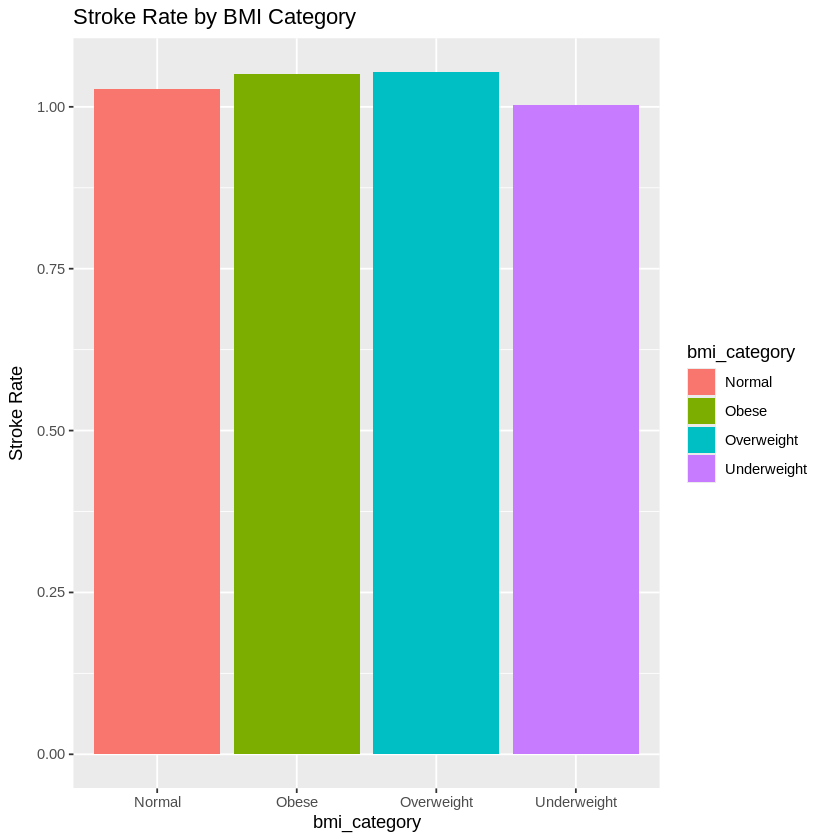

In [ ]:
# ------------------------
# Stroke Rate by BMI Category
# ------------------------
stroke %>%
  group_by(bmi_category) %>%
  summarise(stroke_rate = mean(as.numeric(stroke))) %>%
  ggplot(aes(x = bmi_category, y = stroke_rate, fill = bmi_category)) +
  geom_col() +
  labs(title = "Stroke Rate by BMI Category", y = "Stroke Rate")


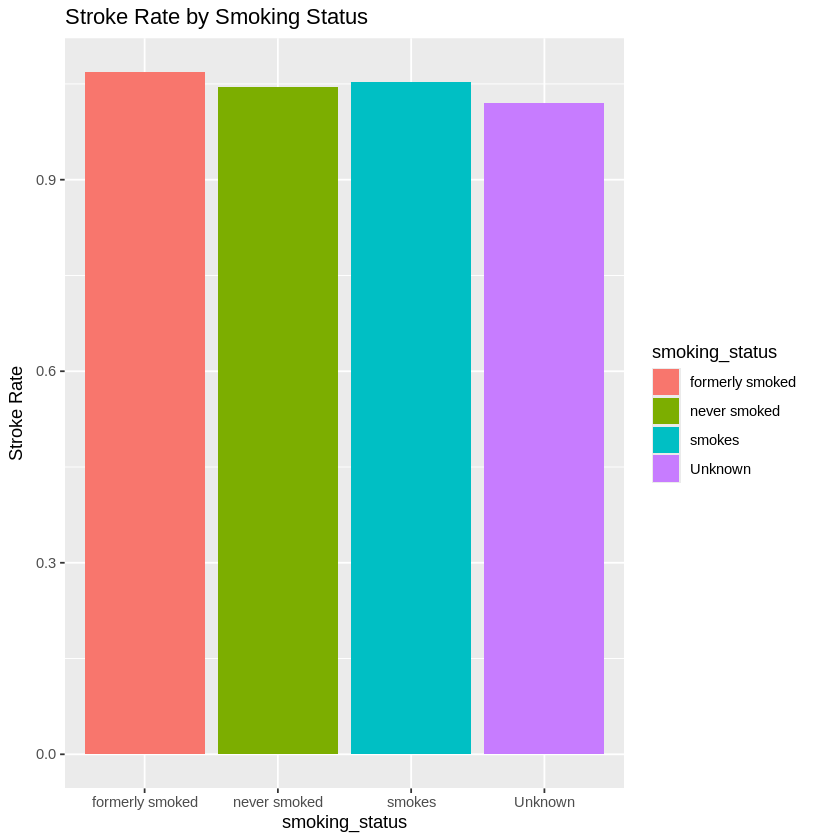

In [ ]:
# ------------------------
# Stroke Rate by Smoking Status
# ------------------------
stroke %>%
  group_by(smoking_status) %>%
  summarise(stroke_rate = mean(as.numeric(stroke))) %>%
  ggplot(aes(x = smoking_status, y = stroke_rate, fill = smoking_status)) +
  geom_col() +
  labs(title = "Stroke Rate by Smoking Status", y = "Stroke Rate")

,age,bmi,avg_glucose_level
age,1.0000000,0.3492883,0.2354423
bmi,0.3492883,1.0000000,0.1858199
avg_glucose_level,0.2354423,0.1858199,1.0000000


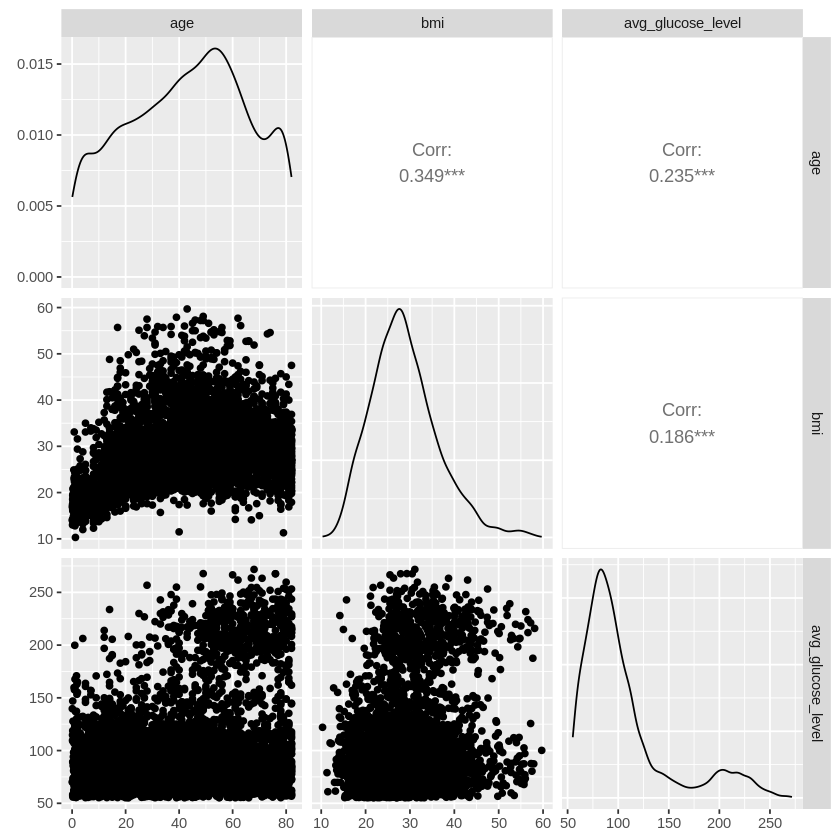

In [ ]:
# ------------------------
# Select numeric columns only
# ------------------------
num_data <- stroke %>% select(age, bmi, avg_glucose_level)

# Compute correlation matrix
cor(num_data)

# Pairwise scatterplots and correlation
GGally::ggpairs(num_data)


In [ ]:
# ------------------------
# T-tests: Compare numeric features between stroke vs no stroke
# ------------------------


In [ ]:
# Age vs Stroke
t.test(age ~ stroke, data = stroke)



	Welch Two Sample t-test

data:  age by stroke
t = -28.284, df = 271.95, p-value < 2.2e-16
alternative hypothesis: true difference in means between group No Stroke and group Stroke is not equal to 0
95 percent confidence interval:
 -27.76029 -24.14726
sample estimates:
mean in group No Stroke    mean in group Stroke 
               41.75915                67.71292 


In [ ]:
# BMI vs Stroke
t.test(bmi ~ stroke, data = stroke)


	Welch Two Sample t-test

data:  bmi by stroke
t = -3.8991, df = 235.54, p-value = 0.000126
alternative hypothesis: true difference in means between group No Stroke and group Stroke is not equal to 0
95 percent confidence interval:
 -2.6508855 -0.8712587
sample estimates:
mean in group No Stroke    mean in group Stroke 
               28.71022                30.47129 


In [ ]:
# Average Glucose Level vs Stroke
t.test(avg_glucose_level ~ stroke, data = stroke)


	Welch Two Sample t-test

data:  avg_glucose_level by stroke
t = -6.9996, df = 216.88, p-value = 3.161e-11
alternative hypothesis: true difference in means between group No Stroke and group Stroke is not equal to 0
95 percent confidence interval:
 -39.16552 -21.95511
sample estimates:
mean in group No Stroke    mean in group Stroke 
               104.0111                134.5714 


In [ ]:
# ------------------------
# Chi-square test: Categorical variables vs Stroke
# ------------------------

In [ ]:
# Gender vs Stroke
table_gender <- table(stroke$gender, stroke$stroke)
chisq.test(table_gender)

Warning message in stats::chisq.test(x, y, ...):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table_gender
X-squared = 0.27072, df = 2, p-value = 0.8734


In [ ]:
# Smoking Status vs Stroke
table_smoking <- table(stroke$smoking_status, stroke$stroke)
chisq.test(table_smoking)



	Pearson's Chi-squared test

data:  table_smoking
X-squared = 34.842, df = 3, p-value = 1.315e-07
